# Import Librarys

In [54]:
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

## Question 1: In a two-class (two-dimensional) problem, the feature vectors in each class are normally distributed according to the following covariance matrix:

cov = [[1.2, 0.4], [0.4, 1.8]]
y1_mean = [0.5, 0.5]^T
y2_mean = [4.0, 4.0]^T


## a) Write a function to plot the two classes (using different colors), with 200 examples per class.

In [68]:
cov = np.array([[1.2, 0.4], [0.4, 1.8]])
y1_mean = np.array([0.5, 0.5]).T
y2_mean = np.array([4.0, 4.0]).T

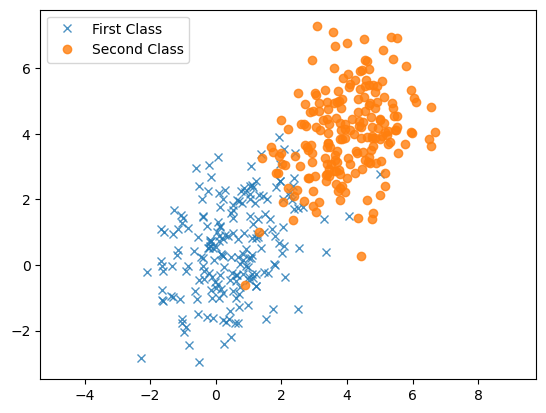

In [69]:
x1, y1 = np.random.multivariate_normal(y1_mean, cov, 200).T
x2, y2 = np.random.multivariate_normal(y2_mean, cov, 200).T

plt.plot(x1, y1, 'x', label="First Class", alpha=0.8)
plt.plot(x2, y2, 'o', label="Second Class", alpha=0.8)
plt.legend()
plt.axis('equal')
plt.show()

## b) Train a logistic regression model with scikit-learn. Use C=1.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend)

In [70]:
X = np.concatenate((x1, x2)).reshape(-1, 1)
y = np.concatenate((y1, y2))
y = np.where(y >= 0.5, 1, 0)
X.shape, y.shape

((400, 1), (400,))

In [71]:
lr = LogisticRegression(C=1.0, random_state=1)
lr.fit(X=X, y=y)

LogisticRegression(random_state=1)

<Axes: >

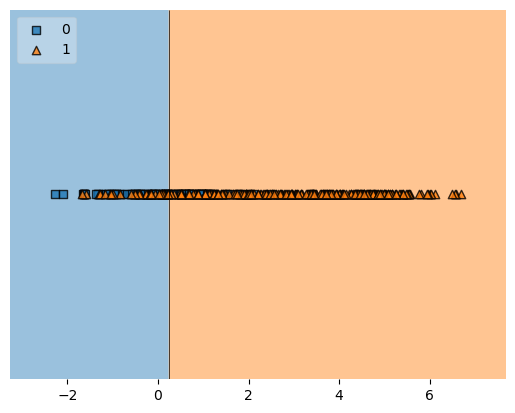

In [72]:
plot_decision_regions(X, y, clf=lr, legend=2)

## c) Do the same with SVM with C=1.0 and random_state=1.

In [73]:
svm = SVC(C=1.0, random_state=1)
svm.fit(X, y)

SVC(random_state=1)

<Axes: >

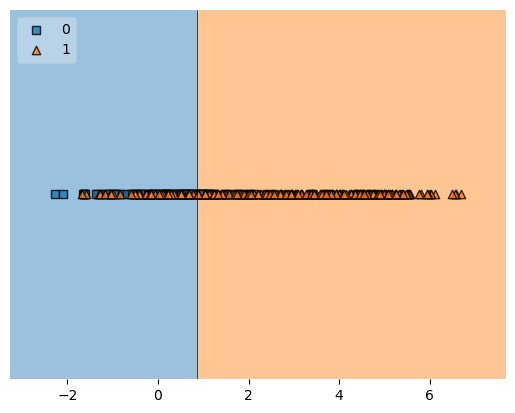

In [74]:
plot_decision_regions(X, y, clf=svm, legend=2)

## d) What is the difference between two models?
Looking for the graph the decision boundary in SVM classifier appear to be in axis x = 0.5, try to regularize more the separability of the classes.

## e) What is the impact on the decision regions by varying C in each method? 

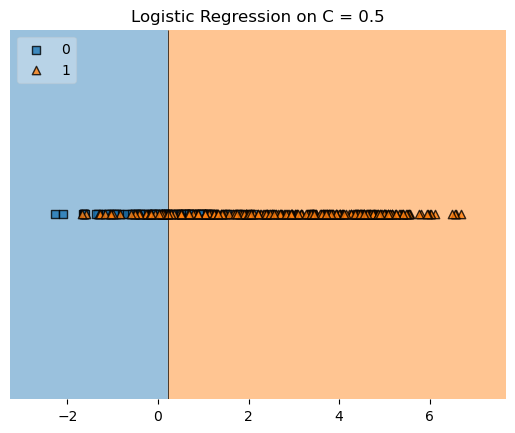

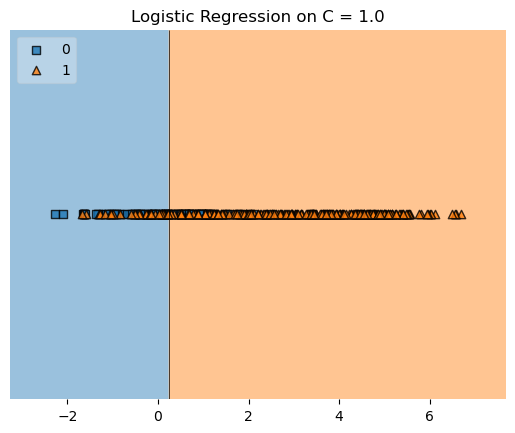

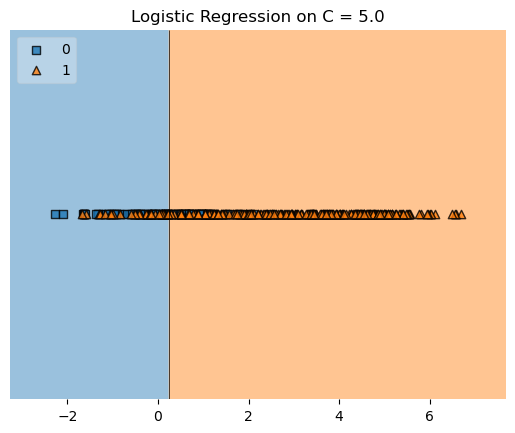

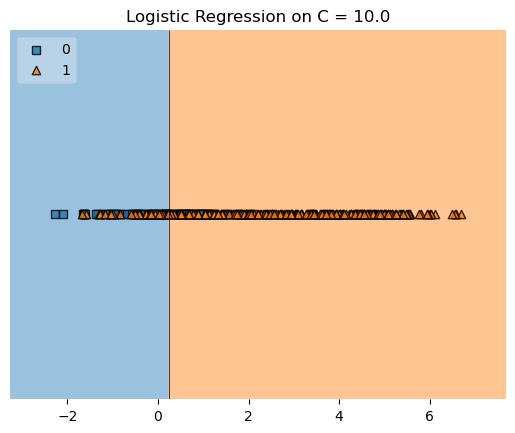

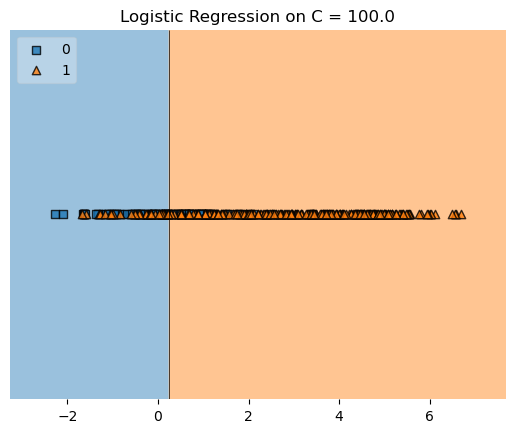

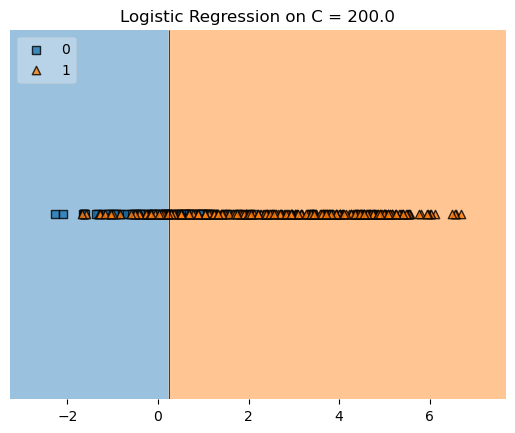

In [75]:
C = [0.5, 1.0, 5.0, 10.0, 100.0, 200.0]

for c in C:
    lr = LogisticRegression(C=c, random_state=1)
    lr.fit(X=X, y=y)
    plot_decision_regions(X, y, clf=lr, legend=2)
    plt.title(f"Logistic Regression on C = {c}")
    plt.show()

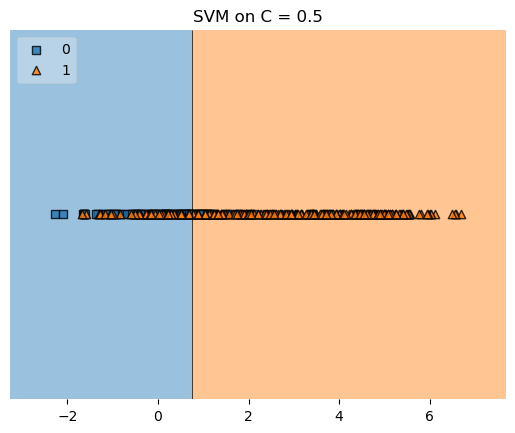

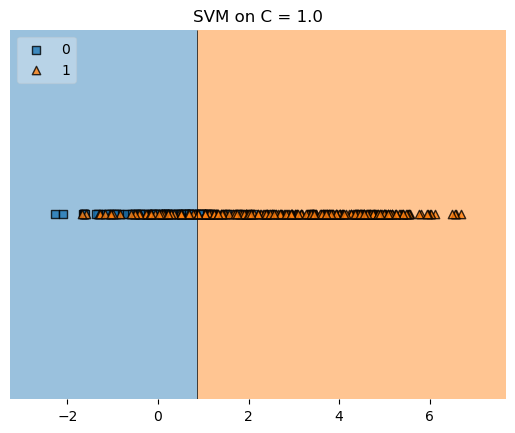

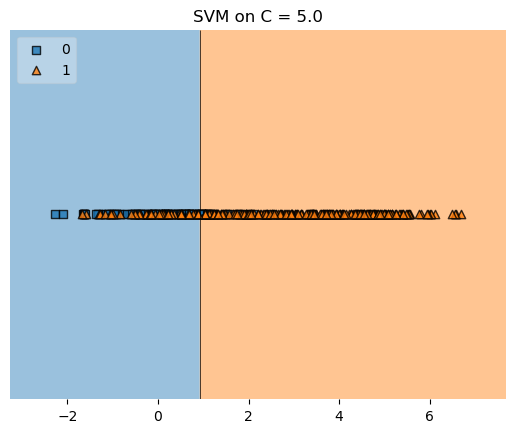

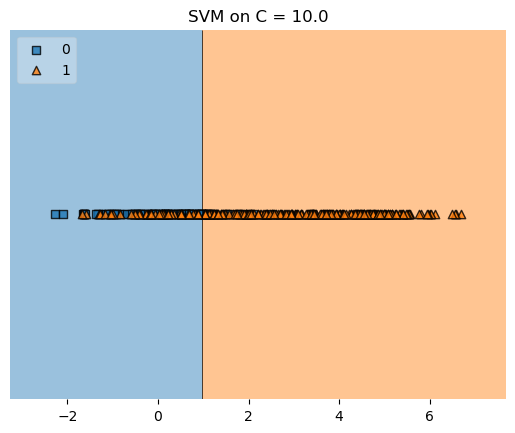

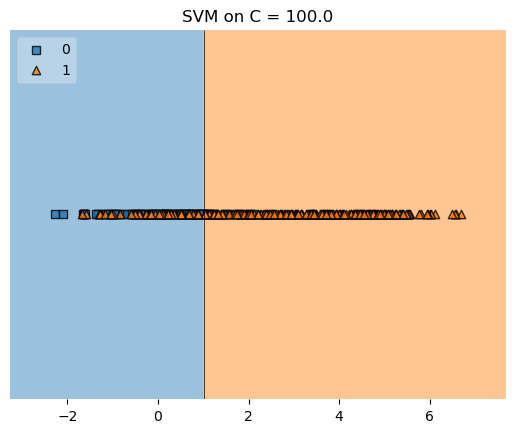

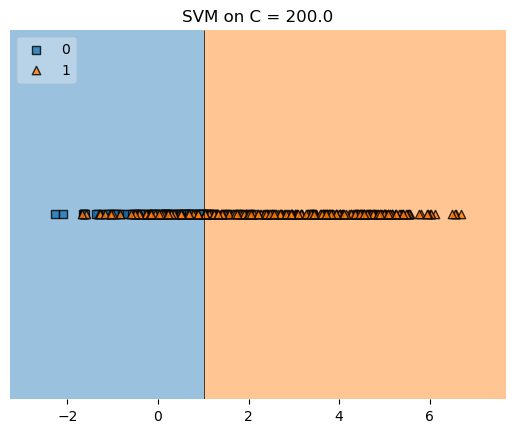

In [76]:
C = [0.5, 1.0, 5.0, 10.0, 100.0, 200.0]

for c in C:
    svm = SVC(C=c, random_state=1)
    svm.fit(X, y)
    plot_decision_regions(X, y, clf=svm, legend=2)
    plt.title(f"SVM on C = {c}")
    plt.show()

Answer the question 2-e if we change the value of hyperparameter C, the classifier appear to not change the decision boundary, I bilieve because we have only one feature for make this decision boundary.

## f) What is the impact on the decision regions with the mean vectors modified to [0.5, 0.5]T, [0.8, 0.8]T?

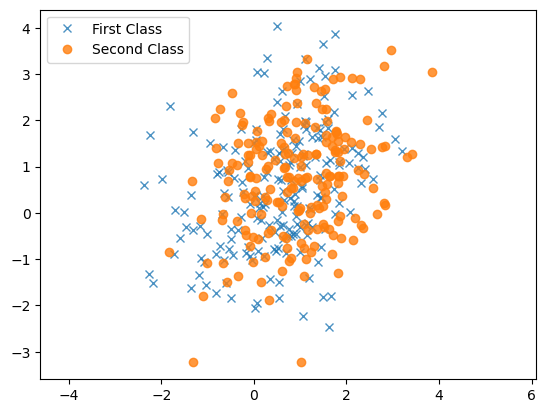

((400, 1), (400,))

In [77]:
cov = np.array([[1.2, 0.4], [0.4, 1.8]])
y1_mean = np.array([0.5, 0.5]).T
y2_mean = np.array([0.8, 0.8]).T
x1, y1 = np.random.multivariate_normal(y1_mean, cov, 200).T
x2, y2 = np.random.multivariate_normal(y2_mean, cov, 200).T

plt.plot(x1, y1, 'x', label="First Class", alpha=0.8)
plt.plot(x2, y2, 'o', label="Second Class", alpha=0.8)
plt.legend()
plt.axis('equal')
plt.show()

X = np.concatenate((x1, x2)).reshape(-1, 1)
y = np.concatenate((y1, y2))
y = np.where(y >= 0.5, 1, 0)
X.shape, y.shape

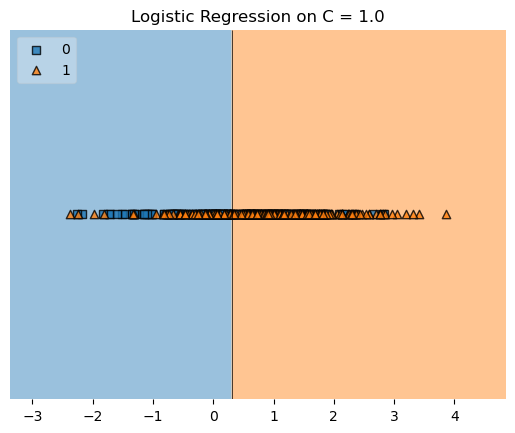

In [78]:
lr = LogisticRegression(C=1.0, random_state=1)
lr.fit(X=X, y=y)
plot_decision_regions(X, y, clf=lr, legend=2)
plt.title(f"Logistic Regression on C = 1.0")
plt.show()

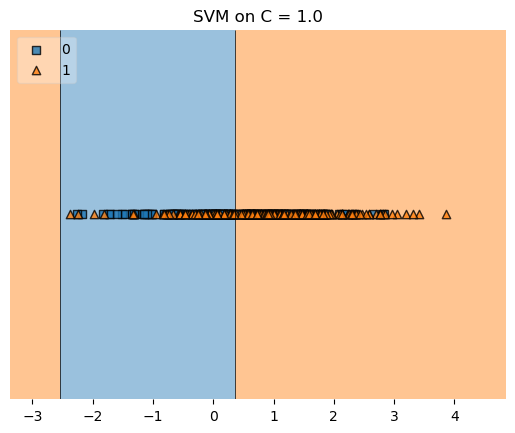

In [79]:
svm = SVC(C=1.0, random_state=1)
svm.fit(X, y)
plot_decision_regions(X, y, clf=svm, legend=2)
plt.title(f"SVM on C = 1.0")
plt.show()

In the Logistic Regression the problem appears to be more complicated to create a decision boundary linearly, in other hand
the SVM classifier, create two decisions boundary to separete the classes more accurately.